In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow import keras

builder = tfds.builder('rock_paper_scissors')
info = builder.info

datos_entrenamiento = tfds.load(name="rock_paper_scissors", split="train")
datos_prueba = tfds.load(name="rock_paper_scissors", split="test")

imagenes_entrenamiento = np.array([example['image'].numpy()[:,:,0] for example in datos_entrenamiento])
etiquetas_entrenamiento = np.array([example['label'].numpy() for example in datos_entrenamiento])

imagenes_prueba = np.array([example['image'].numpy()[:,:,0] for example in datos_prueba])
etiquetas_pruebaa = np.array([example['label'].numpy() for example in datos_prueba])

imagenes_entrenamiento = imagenes_entrenamiento.reshape(2520, 300, 300, 1)
imagenes_prueba = imagenes_prueba.reshape(372, 300, 300, 1)

imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')
imagenes_prueba = imagenes_prueba.astype('float32')

imagenes_entrenamiento /= 255
imagenes_prueba /= 255

modelo = keras.Sequential([
  keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)), # crea un promedio con las capas de entrada
  keras.layers.Conv2D(64, 3, activation='relu'), # capa de convolucion 
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2), #maximiza el input
  keras.layers.Dropout(0.5), # reduce el sobreajuste
  keras.layers.Flatten(), #reduce los resultados (comprime) de matriz a lista
  keras.layers.Dense(128, activation='relu'), # activacion: positivo o cero
  keras.layers.Dense(3, activation='softmax') # activacion: probabilidad
])

modelo.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

historial = modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=5, batch_size=32)

modelo.save('modelo-piedra-papel-o-tijera.h5') 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteOQA75Z/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteOQA75Z/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Epoch 1/5
79/79 [==============================] - 110s 1s/step - loss: 0.7194 - accuracy: 0.7036
Epoch 2/5
79/79 [==============================] - 109s 1s/step - loss: 0.0839 - accuracy: 0.9798
Epoch 3/5
79/79 [==============================] - 109s 1s/step - loss: 0.0235 - accuracy: 0.9964
Epoch 4/5
79/79 [==============================] - 110s 1s/step - loss: 0.0057 - accuracy: 0.9996
Epoch 5/5
79/79 [==============================] - 109s 1s/step - loss: 0.0051 - accuracy: 0.9992


In [14]:
import cv2, sys
filepath = '/content/drive/MyDrive/Programación/imgs/papel4.jpg'

REV_CLASS_MAP = {
    0: "piedra",
    1: "papel",
    2: "tijeras",
    3: "nada"
}


def mapper(val):
    return REV_CLASS_MAP[val]

# prepare the image
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# predict the move made
pred = modelo.predict(np.array([img]).reshape(-1, 300, 300, 1))
move_code = np.argmax(pred[0])
move_name = mapper(move_code)

print("Prediccion: {}".format(move_name))

Prediccion: tijeras


In [ ]:
imagenes = ['papel1', 'papel2', 'papel3', 'piedra1', 'piedra2', 'piedra3', 'piedra4', 'piedra5', 'tijeras1', 'tijeras2', 'tijeras3', 'tijeras4', 'tijeras5']

map( lambda i: np.array([i]).reshape(-1, 300, 300, 1), map( lambda i: cv2.cvtColor(i, cv2.COLOR_BGR2RGB), imagenes))
predicciones = modelo.predict(imagenes)


In [ ]:
import matplotlib.pyplot as plt

nombres_clases = info.features['label'].names

predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  #grafica[etiqueta_prediccion].set_color('red')
  #grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, columnas, i+1)
  graficar_imagen(i, predicciones, etiquetas_pruebaa, imagenes_prueba)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow import keras

builder = tfds.builder('rock_paper_scissors')
info = builder.info

datos_entrenamiento = tfds.load(name="rock_paper_scissors", split="train")
datos_prueba = tfds.load(name="rock_paper_scissors", split="test")

imagenes_entrenamiento = np.array([example['image'].numpy()[:,:,0] for example in datos_entrenamiento])
etiquetas_entrenamiento = np.array([example['label'].numpy() for example in datos_entrenamiento])

imagenes_prueba = np.array([example['image'].numpy()[:,:,0] for example in datos_prueba])
etiquetas_pruebaa = np.array([example['label'].numpy() for example in datos_prueba])

imagenes_entrenamiento = imagenes_entrenamiento.reshape(2520, 300, 300, 1)
imagenes_prueba = imagenes_prueba.reshape(372, 300, 300, 1)

imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')
imagenes_prueba = imagenes_prueba.astype('float32')

imagenes_entrenamiento /= 255
imagenes_prueba /= 255

modelo = keras.Sequential([
  keras.layers.Conv2D()
  keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)), # crea un promedio con las capas de entrada
  keras.layers.Conv2D(64, 3, activation='relu'), # capa de convolucion 
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2), #maximiza el input
  keras.layers.Dropout(0.5), # reduce el sobreajuste
  keras.layers.Flatten(), #reduce los resultados (comprime) de matriz a lista
  keras.layers.Dense(128, activation='relu'), # activacion: positivo o cero
  keras.layers.Dense(3, activation='softmax') # activacion: probabilidad
])

modelo.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

historial = modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=5, batch_size=32)

#modelo.save('modelo-piedra-papel-o-tijera.h5') 

(2520, 300, 300) (2520,)
Epoch 1/5


ValueError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model_save_name = 'modelo-piedra-papel-tijera.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
modelo.save(modelo.state_dict(), path)

AttributeError: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


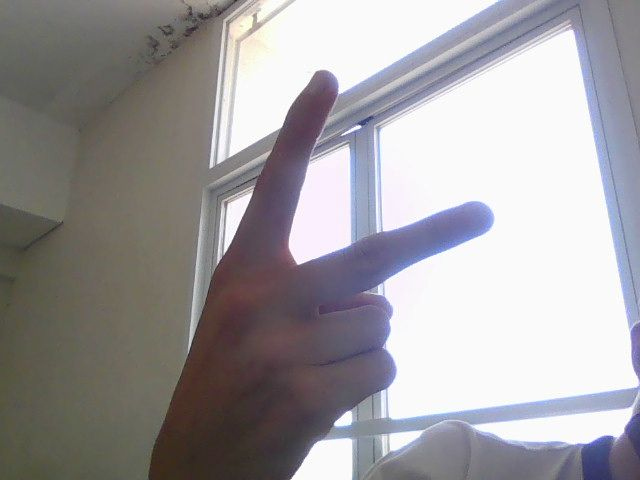

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))